# Predicting the car prices using Linear Regression 

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/Exercise/carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [7]:
dummies=pd.get_dummies(df['Car Model'])

In [8]:
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [9]:
merged_df=pd.concat([df,dummies],axis='columns')

In [11]:
merged_df

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [13]:
clean_df=merged_df.drop(['Car Model','BMW X5'],axis='columns')

In [14]:
clean_df

,Mileage,Sell Price($),Age(yrs),Audi A5,Mercedez Benz C class
0,69000,18000,6,0,0
1,35000,34000,3,0,0
2,57000,26100,5,0,0
3,22500,40000,2,0,0
4,46000,31500,4,0,0
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,1


In [15]:
Y=clean_df['Sell Price($)']
Y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [16]:
X=clean_df.drop('Sell Price($)', axis='columns')
X

,Mileage,Age(yrs),Audi A5,Mercedez Benz C class
0,69000,6,0,0
1,35000,3,0,0
2,57000,5,0,0
3,22500,2,0,0
4,46000,4,0,0
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,1


In [18]:
from sklearn import linear_model
model=linear_model.LinearRegression()

In [20]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
model.predict([[5900,6,0,1]])

array([48798.18384492])

In [24]:
model.score(X,Y)

0.9417050937281083

# New Model Using Training and Testing

In [25]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/6_train_test_split/carprices.csv")
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [26]:
import matplotlib.pyplot as plt 

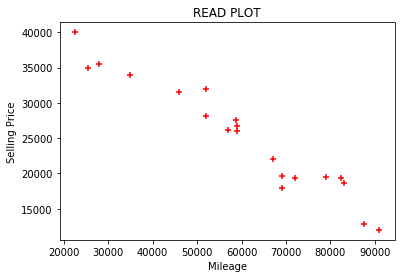

In [31]:
plt.xlabel("Mileage")
plt.title("READ PLOT")
plt.ylabel("Selling Price")
plt.scatter(df.Mileage,df["Sell Price($)"], color='red',marker="+",)

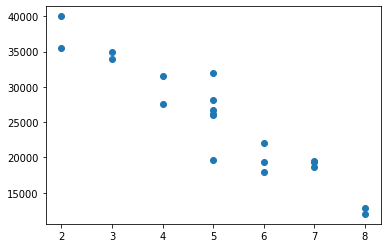

In [29]:
plt.scatter(df['Age(yrs)'],df["Sell Price($)"])

In [32]:
X=df[["Age(yrs)","Mileage"]]

In [33]:
Y=df['Sell Price($)']

In [35]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test ,y_train, y_test =train_test_split(X,Y,test_size=0.2)

In [41]:
len(x_train) # ie 80% of your dataset

16

In [42]:
len(df) #total length of dataset

20

In [45]:
model = linear_model.LinearRegression()

In [46]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
model.predict(x_test)

array([15252.70339278, 17085.78085889, 39536.19450246, 15504.75154437])

In [48]:
y_test

10    18700
11    19500
15    35000
14    19400
Name: Sell Price($), dtype: int64

In [49]:
model.score(x_test,y_test)

0.7150347579832902